In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data/dataset.csv')

## Opis danych

| Variable Name                     | Type       | Description                                                                                |
|-----------------------------------|------------|--------------------------------------------------------------------------------------------|
| id                                | Numeric    | Unique identifier for each listing.                                                        |
| name                              | Categorical| Name of the listing.                                                                       |
| host_id                           | Numeric    | Unique identifier for the host.                                                            |
| host_name                         | Categorical| Name of the host.                                                                          |
| neighbourhood_group               | Categorical| Larger geographical area within the city where the listing is located.                     |
| neighbourhood                     | Categorical| Specific neighbourhood where the listing is located.                                       |
| latitude                          | Numeric    | Latitude coordinate of the listing's location.                                             |
| longitude                         | Numeric    | Longitude coordinate of the listing's location.                                            |
| room_type                         | Categorical| Type of room offered (e.g., entire home/apt, private room, shared room).                   |
| price                             | Numeric    | Price per night for the listing.                                                           |
| minimum_nights                    | Numeric    | Minimum number of nights.                                                                  |
| number_of_reviews                 | Numeric    | Total number of reviews received by the listing.                                           |
| last_review                       | Date       | Date when the most recent review was submitted.                                            |
| reviews_per_month                 | Numeric    | Average number of reviews per month.                                                       |
| calculated_host_listings_count    | Numeric    | Number of listings managed by the same host.                                               |
| availability_365                  | Numeric    | Number of days the listing is available for booking each year.                             |
| number_of_reviews_ltm             | Numeric    | Number of reviews received in the last twelve months.                                      |
| license                           | Categorical| License number or permit ID for the listing, if applicable.                                |
| rating                            | Categorical| Rating of the listing (e.g., based on guest reviews, platform rating system).              |
| bedrooms                          | Categorical| Number of bedrooms in the listing.                                                         |
| beds                              | Numeric    | Number of beds available in the listing.                                                   |
| baths                             | Categorical| Number of bathrooms in the listing (e.g., 1, 1.5, 2).                                      |


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

In [6]:
def basic_preprocessing(df):
    df = df.dropna()
    df = df.drop_duplicates()
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
    df['rating'] = df['rating'].fillna(0)
    df['baths'] = pd.to_numeric(df['baths'], errors='coerce')
    df['baths'] = df['baths'].fillna(0)
    return df

In [7]:
df = basic_preprocessing(df)
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating,beds,baths
count,2.075800e+04,2.075800e+04,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,3.034044e+17,1.749316e+08,40.726798,-73.939161,187.776616,28.558435,42.642596,1.257910,18.844108,205.990317,10.852105,3.878539,1.723721,1.177257
std,3.901216e+17,1.725541e+08,0.060294,0.061403,1022.797208,33.536518,73.561654,1.904661,70.910834,135.087768,21.357071,1.841217,1.212272,0.481209
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.708808e+07,2.041738e+07,40.684150,-73.980710,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,4.330000,1.000000,1.000000
50%,4.993003e+07,1.087271e+08,40.722820,-73.949587,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,4.750000,1.000000,1.000000
75%,7.216019e+17,3.144102e+08,40.763098,-73.917460,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,4.910000,2.000000,1.000000
max,1.054376e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,5.000000,42.000000,15.500000


## Distribution of selected numerical features

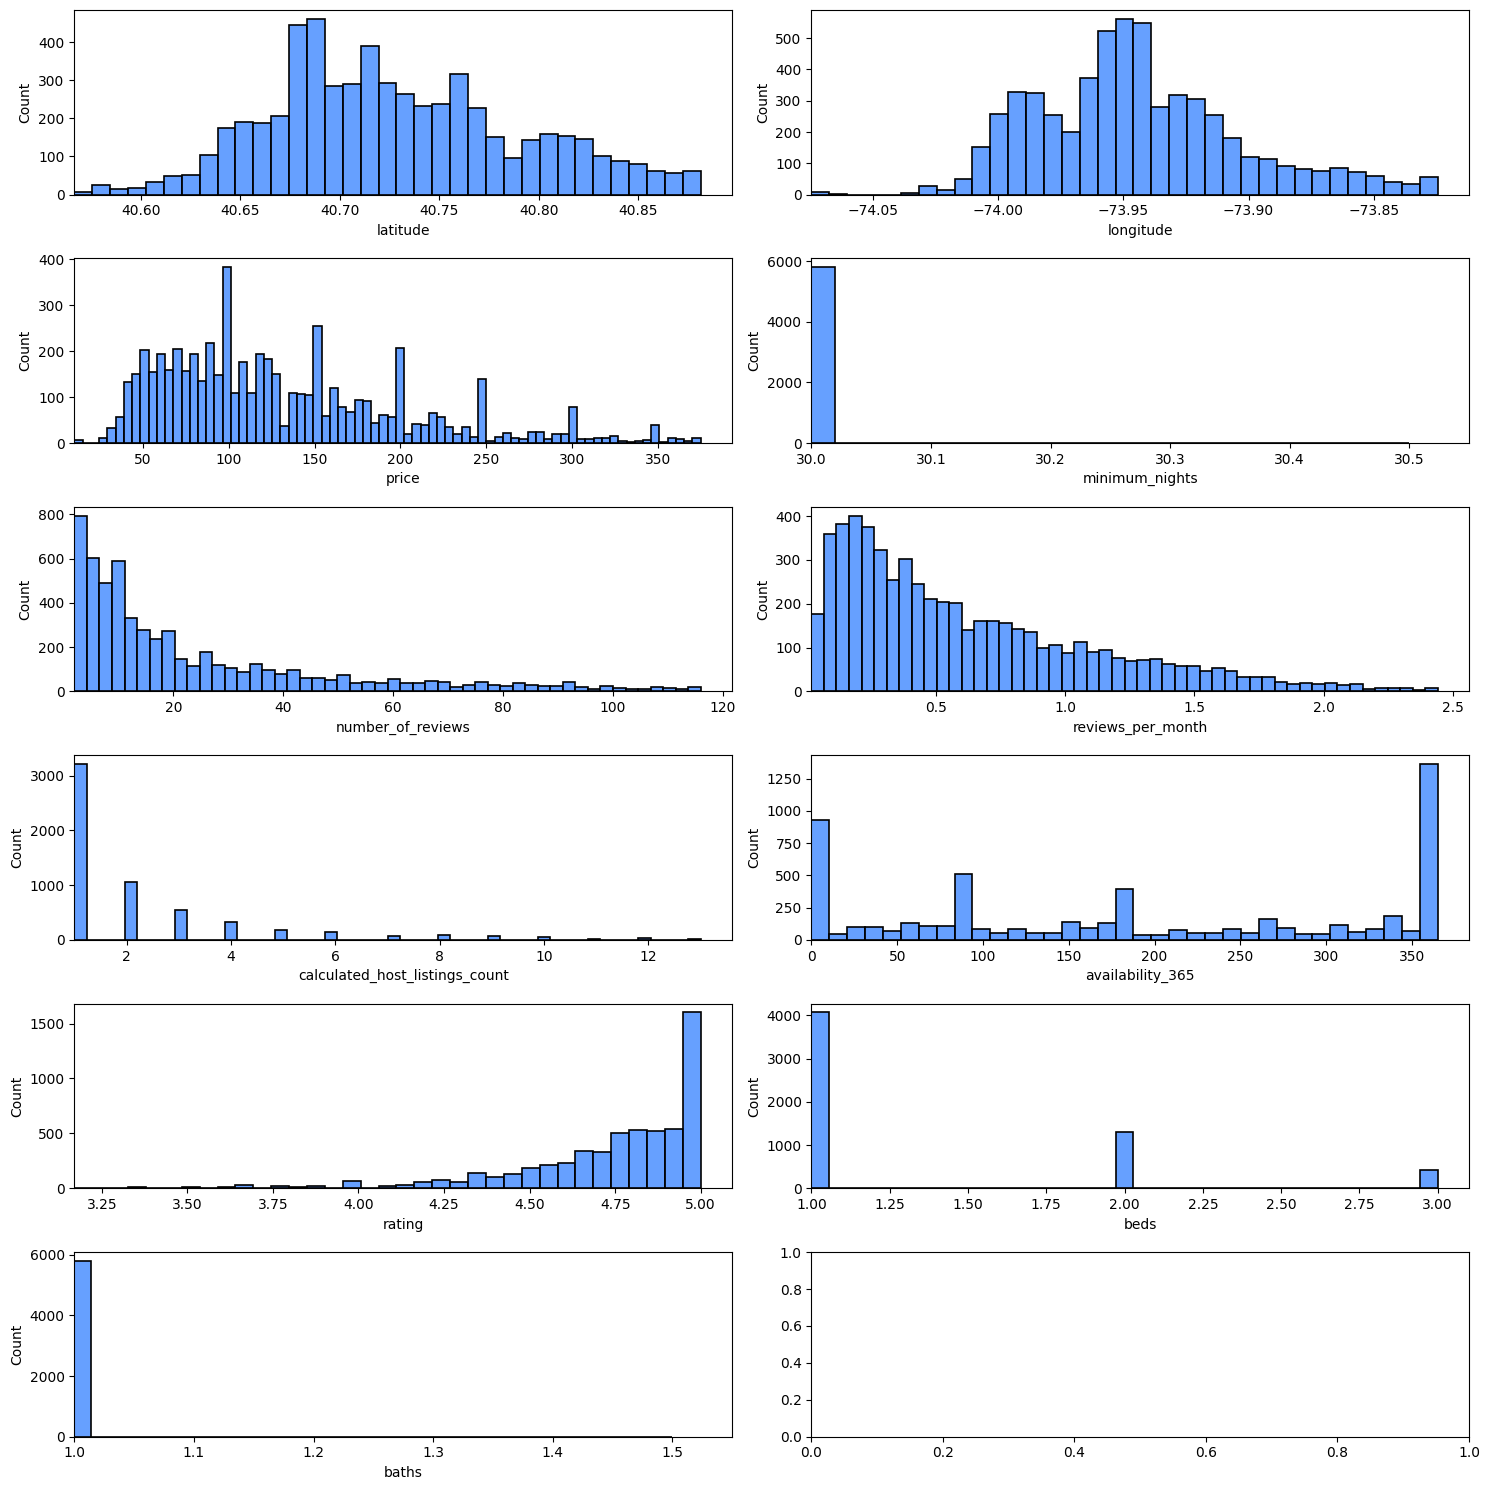

In [53]:
numeric_features = ["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365", "rating", "beds", "baths"]
fig, axs = plt.subplots(6, 2, figsize=(15, 15))
axs = axs.flatten()
k = np.floor(np.sqrt(df.shape[0])).astype(int)
k2 = np.floor(2*np.cbrt(df.shape[0])).astype(int)
for i, col in enumerate(numeric_features):
    if col == 'price':
        sns.histplot(df[df[col] < 1000][col], ax=axs[i], bins=k, color='#3381ff', edgecolor='black', linewidth=1.2)
    elif col == 'minimum_nights':
        sns.histplot(df[df[col] < 365][col], ax=axs[i], bins=50, color='#3381ff', edgecolor='black', linewidth=1.2)
    elif col == 'reviews_per_month':
        sns.histplot(df[df[col] < 30][col], ax=axs[i], bins=50, color='#3381ff', edgecolor='black', linewidth=1.2)
    elif col == 'number_of_reviews':
        sns.histplot(df[col], ax=axs[i], bins=50, color='#3381ff', edgecolor='black', linewidth=1.2)
    elif col == 'calculated_host_listings_count':
        sns.histplot(df[col], ax=axs[i], bins=50, color='#3381ff', edgecolor='black', linewidth=1.2)
    elif col == 'beds':
        sns.histplot(df[df[col] < 10][col], ax=axs[i], bins=k2, color='#3381ff', edgecolor='black', linewidth=1.2)
    elif col == 'baths':
        sns.histplot(df[df[col] < 6][col], ax=axs[i], bins=k2, color='#3381ff', edgecolor='black', linewidth=1.2)
    else:
        sns.histplot(df[col], ax=axs[i], bins=k2, color='#3381ff', edgecolor='black', linewidth=1.2)
    axs[i].set_xlim(left=min(df[col]))
plt.tight_layout()


## Affect of neighbourhood_group on features

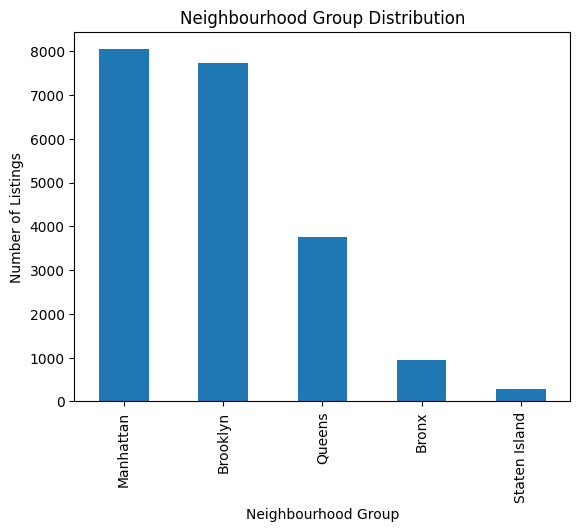

In [8]:
fig = pd.Series(df["neighbourhood_group"]).value_counts().plot(kind = "bar")
fig.set_title("Neighbourhood Group Distribution")
fig.set_ylabel("Number of Listings")
fig.set_xlabel("Neighbourhood Group")
plt.show()

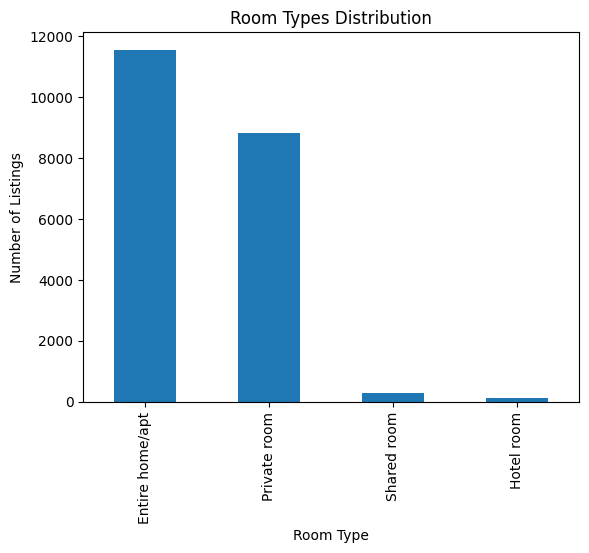

In [9]:
fig = pd.Series(df["room_type"]).value_counts().plot(kind = "bar")
fig.set_title("Room Types Distribution")
fig.set_ylabel("Number of Listings")
fig.set_xlabel("Room Type")
plt.show()

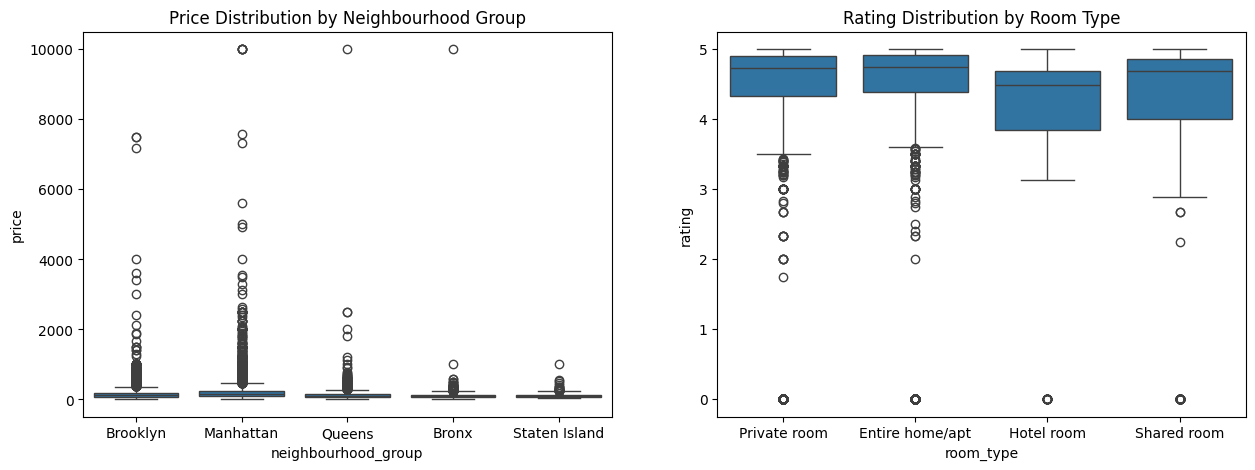

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=df[df['price'] < 50000], x='neighbourhood_group', y='price', ax=axs[0])
sns.boxplot(data=df, x='room_type', y='rating', ax=axs[1])
axs[0].set_title('Price Distribution by Neighbourhood Group')
axs[1].set_title('Rating Distribution by Room Type')
plt.show()


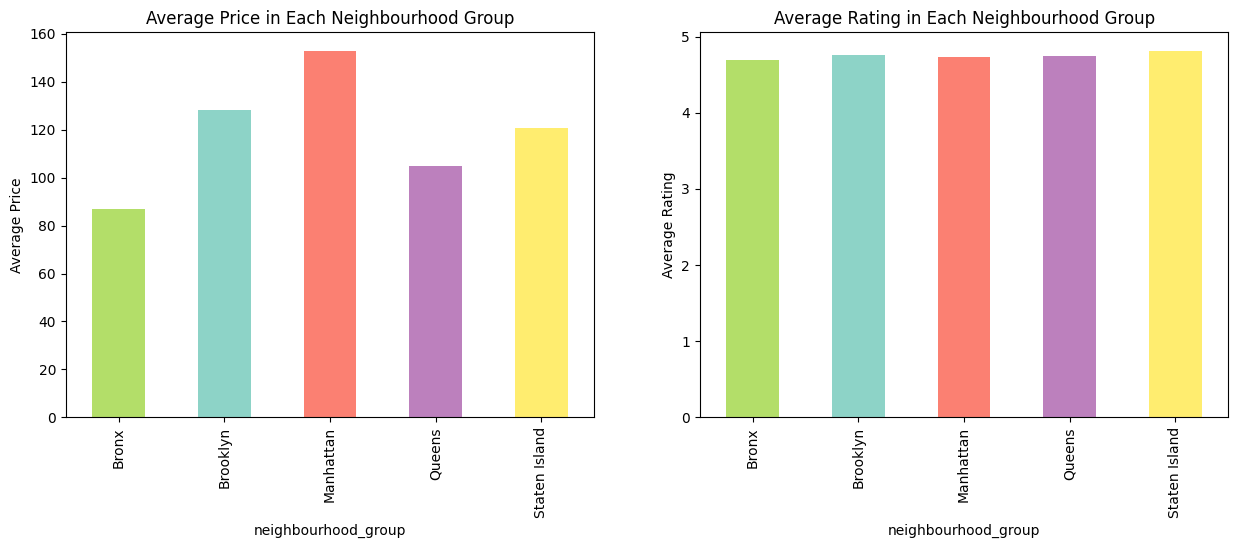

In [52]:
import matplotlib.cm as cm

colors = cm.Set3(np.linspace(0, 1, df['neighbourhood_group'].nunique()))
color_map = {group: color for group, color in zip(df['neighbourhood_group'].unique(), colors)}

df_filtered = df[(df['price'] < 50000) & (df['rating'] != 0)]

df_prices = df_filtered.groupby('neighbourhood_group')['price'].mean()
df_ratings = df_filtered.groupby('neighbourhood_group')['rating'].mean()

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

df_prices.plot(kind='bar', ax=axs[0], color=[color_map[group] for group in df_prices.index])
axs[0].set_title('Average Price in Each Neighbourhood Group')
axs[0].set_ylabel('Average Price')

df_ratings.plot(kind='bar', ax=axs[1], color=[color_map[group] for group in df_ratings.index])
axs[1].set_title('Average Rating in Each Neighbourhood Group')
axs[1].set_ylabel('Average Rating')

plt.show()


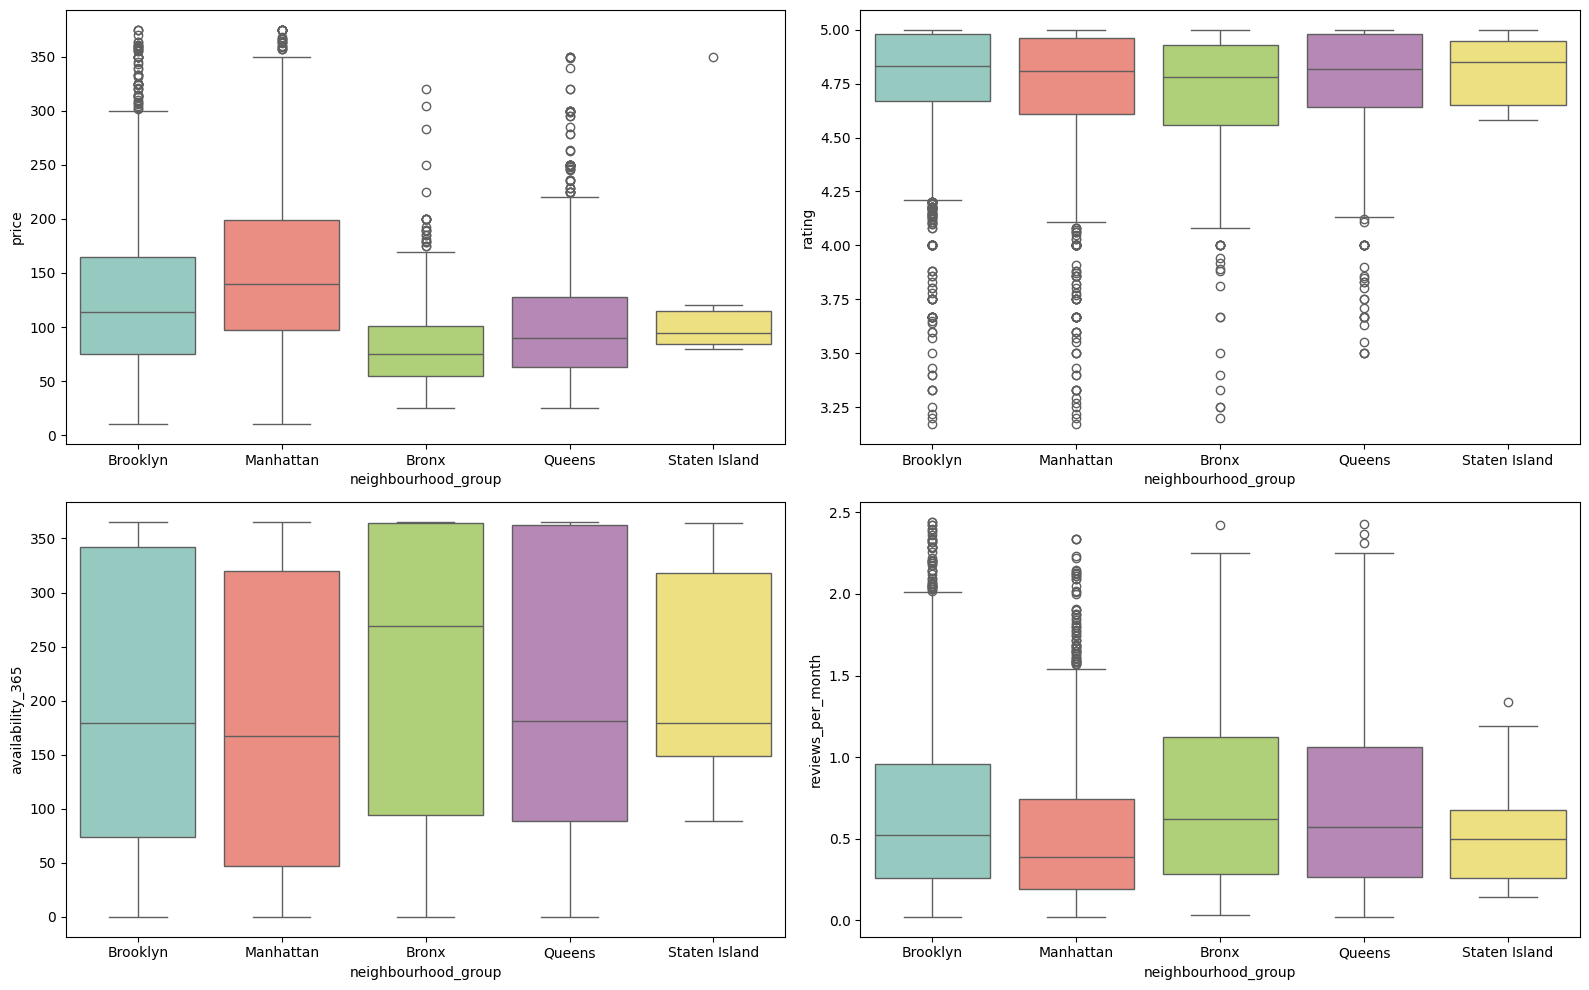

In [58]:
cols = ['price', 'rating', 'availability_365', 'reviews_per_month']
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
for col in cols:
    if col == 'price':
        sns.boxplot(data=df[df[col] < 1000], x='neighbourhood_group', y=col, ax=axs[cols.index(col) // 2][cols.index(col) % 2], hue='neighbourhood_group', palette=color_map, legend=False)
    else:
        sns.boxplot(data=df, x='neighbourhood_group', y=col, ax=axs[cols.index(col) // 2][cols.index(col) % 2], hue='neighbourhood_group', palette=color_map, legend=False)
plt.tight_layout()

## Correlation Matrix

<Axes: >

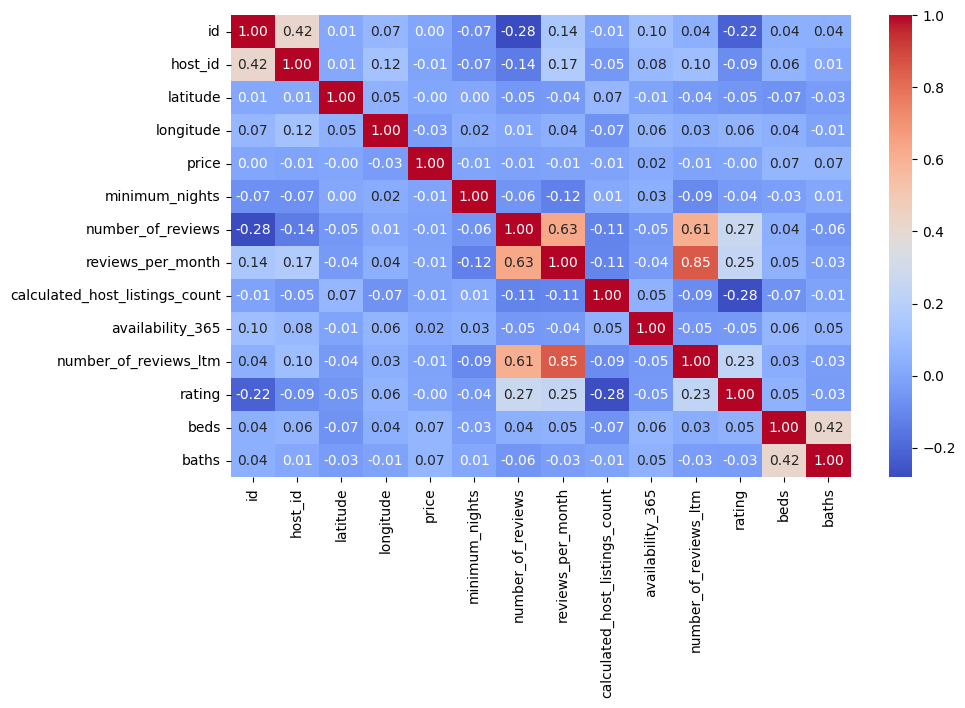

In [13]:
num_cols = df.select_dtypes(include=np.number).columns.to_list()
corr = df[num_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

## Geographical visualization

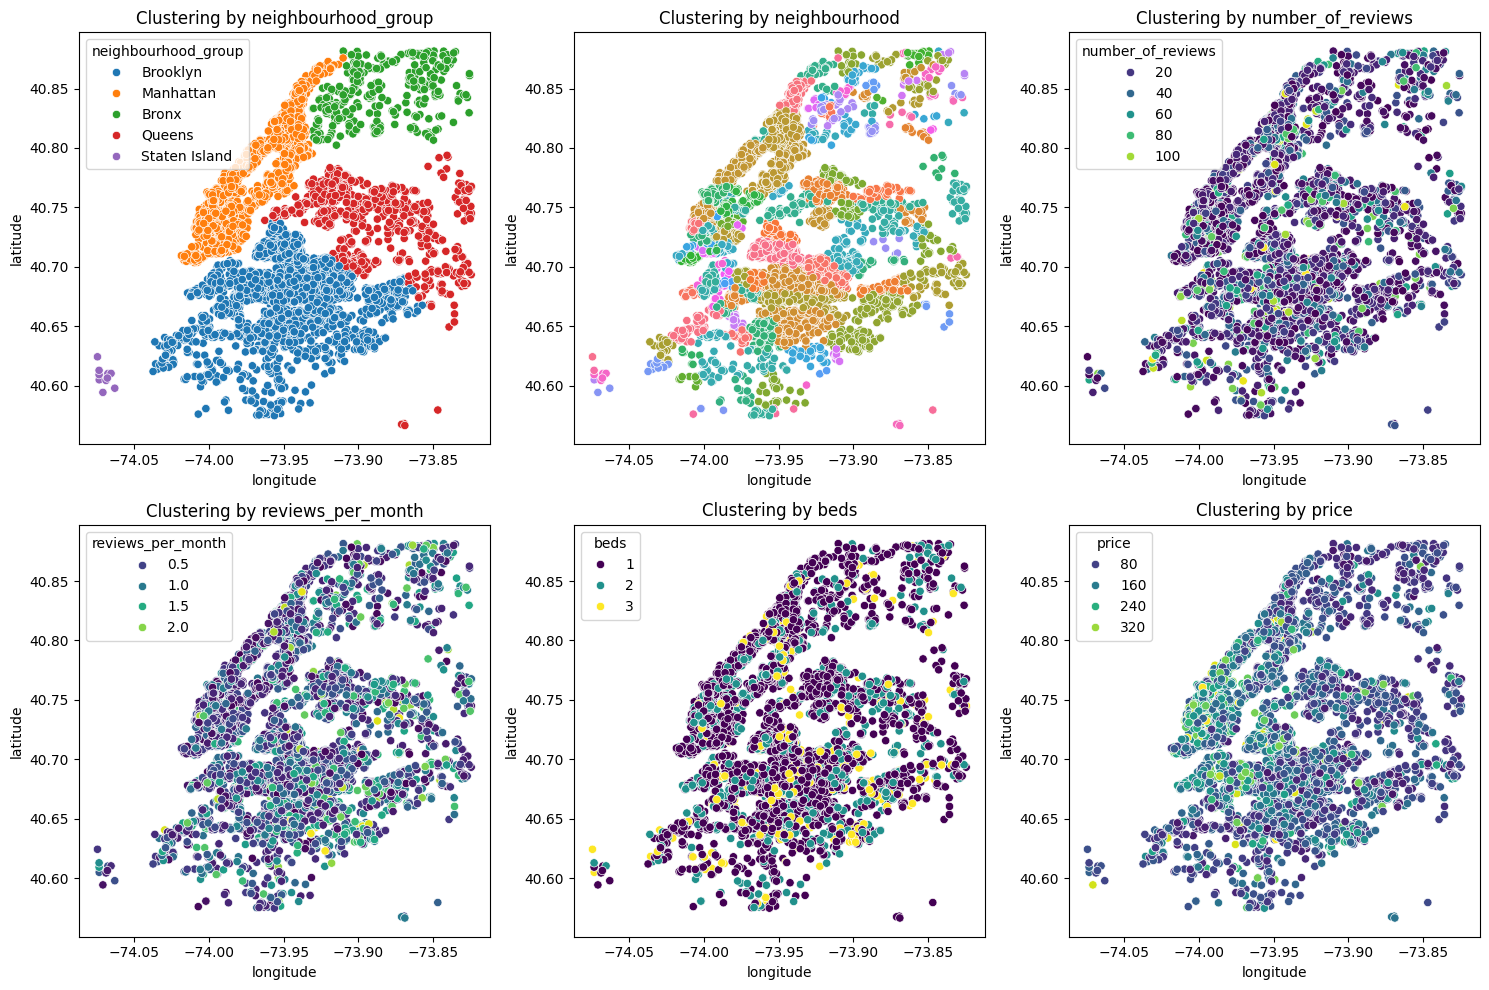

In [15]:
import data.prep as prep
df = prep.remove_outliers(df)

clustering = ["neighbourhood_group", "neighbourhood", "number_of_reviews", "reviews_per_month", "beds", "price"]

fig, axs = plt.subplots(2, 3, figsize=(15,10))
for i, ax in enumerate(axs.flatten()):
    if i < 2:
        continue

    colname = clustering[i]
    scatter = sns.scatterplot(data=df, x="longitude", y="latitude", hue=colname, palette="viridis", ax=ax)
    ax.set_title(f"Clustering by {colname}")

sns.scatterplot(data=df, x="longitude", y="latitude", hue=clustering[0], ax=axs.flatten()[0])
axs.flatten()[0].set_title(f"Clustering by {clustering[0]}")
# sns.scatterplot(data=df, x="longitude", y="latitude", hue=clustering[1], ax=axs.flatten()[1])
sns.scatterplot(data=df, x="longitude", y="latitude", hue=clustering[1], ax=axs.flatten()[1], legend=False)
axs.flatten()[1].set_title(f"Clustering by {clustering[1]}")



plt.tight_layout()
plt.show()